# Lead Scoring

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

### Inspecting

In [122]:
df = pd.read_csv('Leads.csv')
df.to_pickle('init.pkl')

In [123]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [124]:
df.shape

(9240, 37)

In [125]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [127]:
for column in df.select_dtypes('object').columns:
    print(f"============= {column} =============")
    print(df[column].value_counts(normalize=True)[:5])

============= Prospect ID =============
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
Name: proportion, dtype: float64
============= Lead Origin =============
Lead Origin
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: proportion, dtype: float64
============= Lead Source =============
Lead Source
Google            0.311604
Direct Traffic    0.276293
Olark Chat        0.190678
Organic Search    0.125380
Reference         0.058018
Name: proportion, dtype: float64
============= Do Not Email =============
Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64
============= Do Not Call =============
Do Not Call
No     0.99978

### Removing ID

In [128]:
# Remove Identity columns as they do not have any prediction power (too unique)
df.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

### Replacing 'Select' Terms

In [129]:
# The "Select" terms must be replaced from all columns (missing data)
df.replace('Select', np.nan, inplace=True)

### Columns with high Missing Values

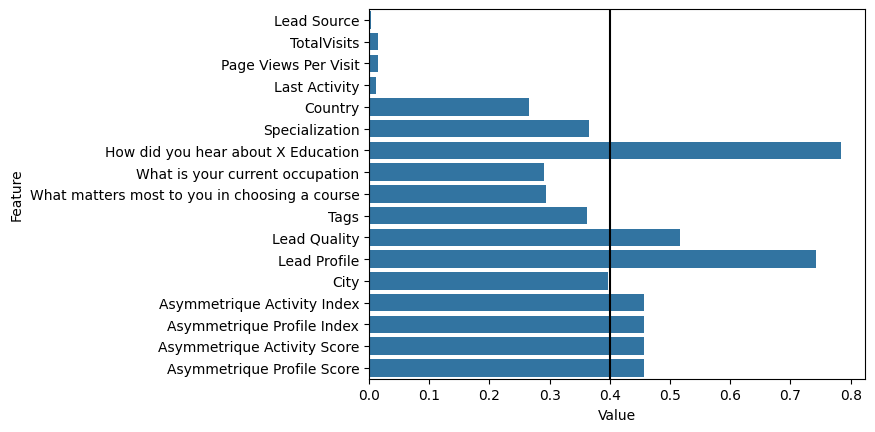

In [130]:
# Check the number of nulls
NULL_COLUMN_THRESHOLD = 0.4

null_percent = df.isnull().sum() / df.shape[0] 
null_features = null_percent[null_percent > 0]

# Drop any columns with null values more than this%
df.drop(columns=null_percent[null_percent > NULL_COLUMN_THRESHOLD].index, inplace=True)

# Visualize.
null_features_df = null_features.reset_index()
null_features_df.columns = ['Feature', 'Value']
sns.barplot(x='Value', y='Feature', data=null_features_df, orient='h')

plt.axvline(NULL_COLUMN_THRESHOLD, color='k')
plt.show()

In [131]:
df.to_pickle('cleaning_high_missing.pkl')

### Imputation

In [132]:
df = pd.read_pickle('cleaning_high_missing.pkl')

In [133]:
remaining = df.isnull().mean()
remaining[remaining > 0]

Lead Source                                      0.003896
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Tags                                             0.362879
City                                             0.397078
dtype: float64

#### Imputing Lead Source

In [134]:
# If number of nulls is low then we can impute it.
df['Lead Source'].value_counts(normalize=True, dropna=False)[:5]

Lead Source
Google            0.310390
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Reference         0.057792
Name: proportion, dtype: float64

In [135]:
# For 'Lead Source', we observe that Mode is Google. And very small fraction is NA. 
# If unknown, we can assume that they were redirected from Google.
# So we impute this information with the mode value (Google)
df['Lead Source'] = df['Lead Source'].fillna(df['Lead Source'].mode()[0])

#### Remaining Missing Nulls

In [136]:
# If number of nulls is low then we can impute it.
df['TotalVisits'].value_counts(normalize=True, dropna=False).loc[:5]

TotalVisits
0.0    0.236905
2.0    0.181818
3.0    0.141342
4.0    0.121212
5.0    0.084740
Name: proportion, dtype: float64

In [137]:
df[df['TotalVisits'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 137 entries, 77 to 9087
Data columns (total 28 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    137 non-null    object 
 1   Lead Source                                    137 non-null    object 
 2   Do Not Email                                   137 non-null    object 
 3   Do Not Call                                    137 non-null    object 
 4   Converted                                      137 non-null    int64  
 5   TotalVisits                                    0 non-null      float64
 6   Total Time Spent on Website                    137 non-null    int64  
 7   Page Views Per Visit                           0 non-null      float64
 8   Last Activity                                  34 non-null     object 
 9   Country                                        0 non-null

In [138]:
# we observe that when this value is null, some other column values also tends to be null
# For example, Page Views Per Visit is always null, Country & City is null half the time, and Specialization is also null. 
# Last Activity also has many nul values.
# It is likely that the data is captured in a specific way, and there's an edge case where data is missed, which affects many other columns.
# It is best to drop these rows.

In [139]:
df.dropna(subset=['TotalVisits'], inplace=True)

In [140]:
remaining = df.isnull().mean()
remaining[remaining > 0]

Country                                          0.255300
Specialization                                   0.362957
What is your current occupation                  0.294738
What matters most to you in choosing a course    0.296825
Tags                                             0.366143
City                                             0.395474
dtype: float64

In [141]:
df.to_pickle('cleaning_null_rows.pkl')

### Constant Columns

In [142]:
# Remove columns with all values constant.

constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("removing", constant_cols)

removing ['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']


In [143]:
df.drop(columns=constant_cols, inplace=True)

In [144]:
df.to_pickle('cleaning_constant_removed.pkl')

### Binary Variables

In [145]:
boolean_columns = [
    'Do Not Email', 'Do Not Call',
    'Search', 'Magazine', 'Newspaper Article', 
    'X Education Forums', 'Newspaper', 'Digital Advertisement', 
    'Through Recommendations', 'Receive More Updates About Our Courses', 
    'Update me on Supply Chain Content', 'Get updates on DM Content', 
    'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview',
]

def yes_no_boolean(value):
    if isinstance(value, bool):
        # already converted.
        return value
    if value.lower() == 'yes':
        return True
    elif value.lower() == 'no':
        return False
    raise ValueError(f"Invalid value: {value}")

for column in boolean_columns:
    if column not in df.columns:
        # dropped before.
        continue
    df[column] = df[column].apply(yes_no_boolean).astype(bool)

In [146]:
# ensure there is no other value except for True and False.
df['Converted'] = df['Converted'].astype(bool)

### Clubbing Categorical Values

In [147]:
# club less common values together into one category.
# also include NA.

In [148]:
threshold = 0.95

for column in df.select_dtypes(include=['object']).columns:
# for column in ['Country']:
    # print(f"============= {column} ===============")
    value_counts = df[column].value_counts(normalize=True)
    cumulative_counts = value_counts.cumsum()
    less_common_values = cumulative_counts[cumulative_counts > threshold].index.to_list()

    first_category = value_counts.index[0]
    if cumulative_counts[first_category] > threshold:
        less_common_values.remove(first_category)

    # print("less_common_values", less_common_values)

    def replacer(value):
        if pd.isna(value):
            return value
        if value not in less_common_values:
            return value
        return 'others'
    
    df[column] = df[column].apply(replacer)
    print(f"Number of uniques for '{column}' is", df[column].nunique())

Number of uniques for 'Lead Origin' is 3
Number of uniques for 'Lead Source' is 5
Number of uniques for 'Last Activity' is 7
Number of uniques for 'Country' is 2
Number of uniques for 'Specialization' is 14
Number of uniques for 'What is your current occupation' is 2
Number of uniques for 'What matters most to you in choosing a course' is 2
Number of uniques for 'Tags' is 12
Number of uniques for 'City' is 5
Number of uniques for 'Last Notable Activity' is 5


### Low Variation

In [149]:
THRESHOLD_LOW_VAR = 0.999

# Check if a vast majority values are same, and drop these column, it is not useful.
low_variation_columns = []
printable = []
for column in df.columns:

    value_counts = df[column].value_counts(normalize=True)
    cumulative_counts = value_counts.cumsum()

    first_category = value_counts.index[0]
    
    if cumulative_counts[first_category] > THRESHOLD_LOW_VAR:
        printable.append({
            'name': column,
            'type': df.dtypes[column],
            'dominant_value': first_category,
            'percent': 100 * cumulative_counts[first_category],
        })
        # print(f"'{column}' ({type()}) has dominant '{first_category}' ", round(cumulative_counts[first_category], 4)) 
        low_variation_columns.append(column)
pd.DataFrame(printable)

,name,type,dominant_value,percent
0,Do Not Call,bool,False,99.978029
1,What matters most to you in choosing a course,object,Better Career Prospects,99.968755
2,Newspaper Article,bool,False,99.978029
3,X Education Forums,bool,False,99.989015
4,Newspaper,bool,False,99.989015
5,Digital Advertisement,bool,False,99.956058
6,Through Recommendations,bool,False,99.923102


In [150]:
df.drop(columns=low_variation_columns, inplace=True)

In [151]:
df.to_pickle('cleaning_low_variation_removed.pkl')

### Null Row Removal

In [152]:
df['Converted'].value_counts()

Converted
False    5642
True     3461
Name: count, dtype: int64

In [153]:
# Logistic Regression requires all non-null rows, so we drop any rows with any null column value
rows_to_be_removed = df.isnull().any(axis=1)
print("removing", sum(rows_to_be_removed))
df = df[~rows_to_be_removed]

removing 5478


In [154]:
# still balanced.
df['Converted'].value_counts()

Converted
False    1998
True     1627
Name: count, dtype: int64

In [155]:
# Fraction of rows retained after cleanup.
len(df) / len(pd.read_pickle('init.pkl'))

0.39231601731601734

In [156]:
df.to_pickle('null_row_removed.pkl')

In [157]:
df.to_pickle('cleaning_final.pkl')

In [158]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## EDA

In [189]:
# Here we observe many graphs and their patterns.

<Figure size 640x480 with 0 Axes>

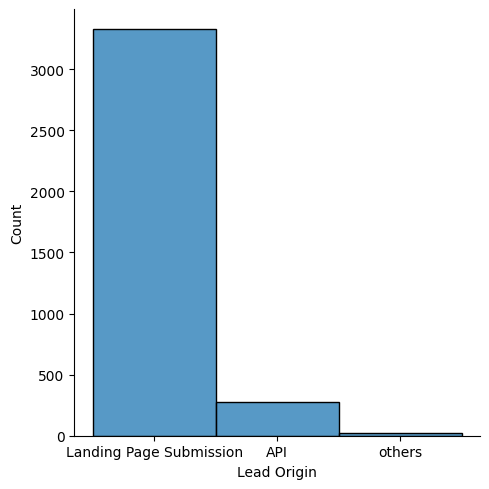

<Figure size 640x480 with 0 Axes>

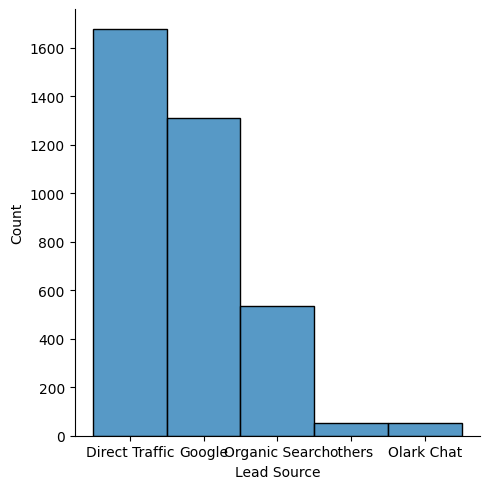

<Figure size 640x480 with 0 Axes>

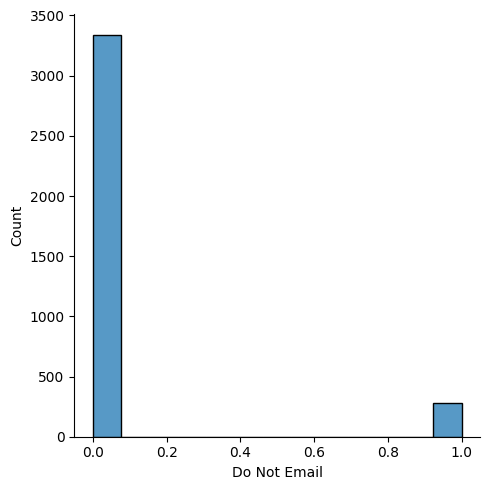

<Figure size 640x480 with 0 Axes>

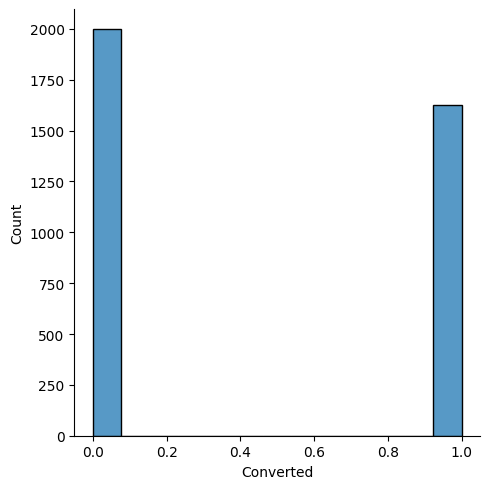

<Figure size 640x480 with 0 Axes>

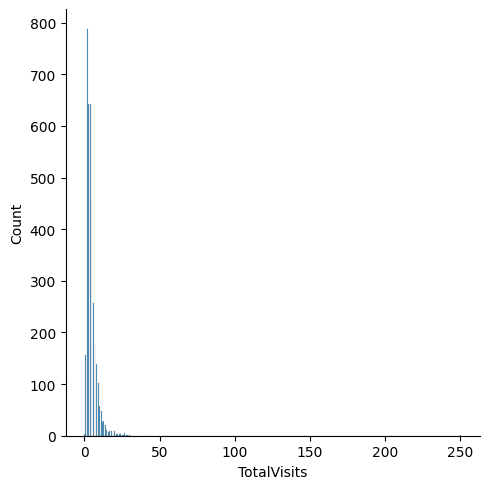

<Figure size 640x480 with 0 Axes>

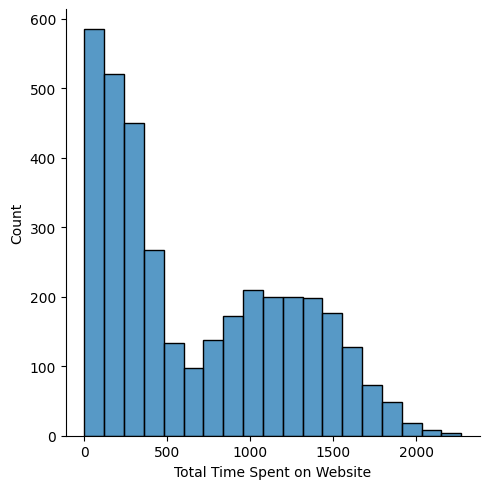

<Figure size 640x480 with 0 Axes>

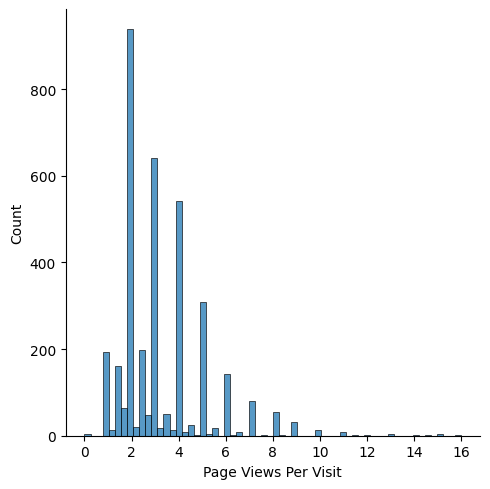

<Figure size 640x480 with 0 Axes>

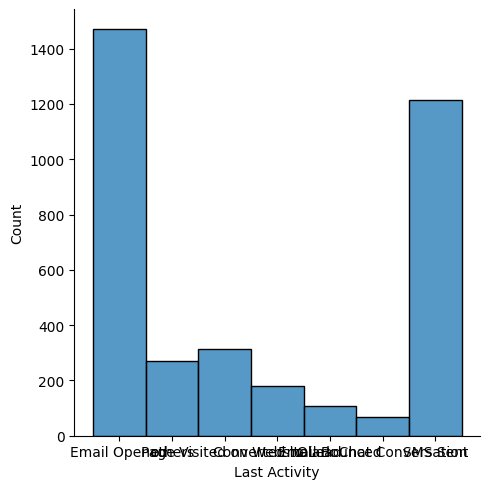

<Figure size 640x480 with 0 Axes>

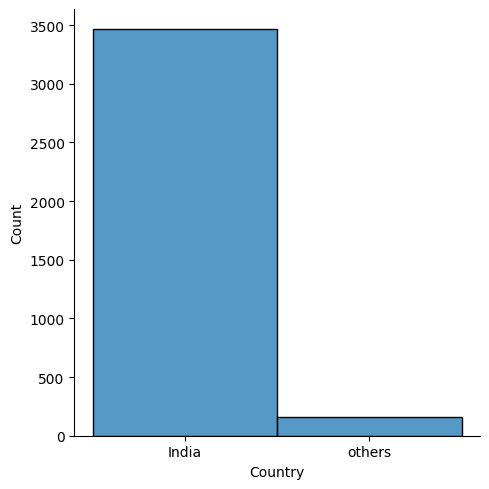

<Figure size 640x480 with 0 Axes>

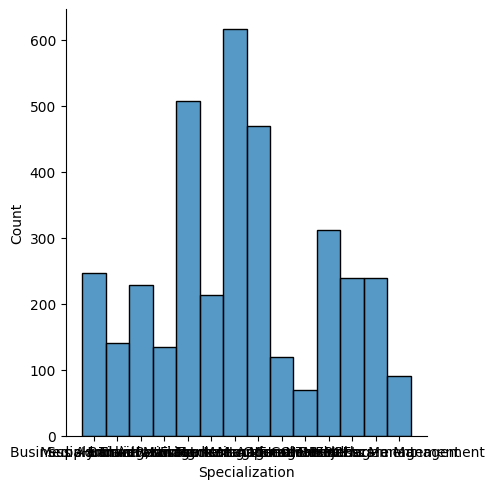

<Figure size 640x480 with 0 Axes>

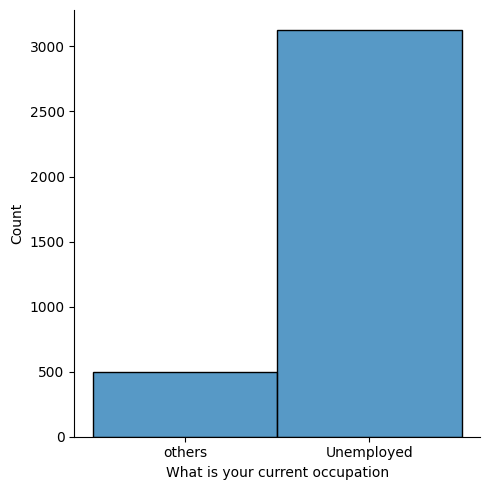

<Figure size 640x480 with 0 Axes>

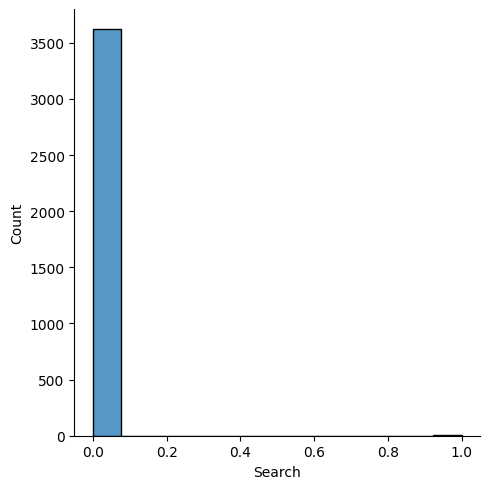

<Figure size 640x480 with 0 Axes>

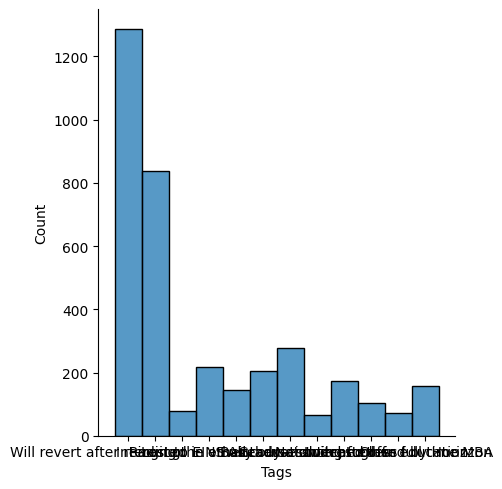

<Figure size 640x480 with 0 Axes>

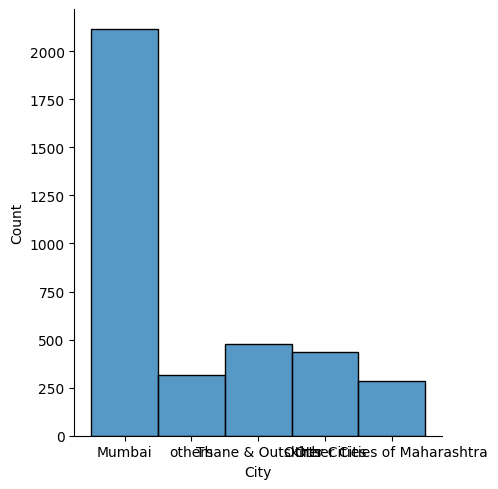

<Figure size 640x480 with 0 Axes>

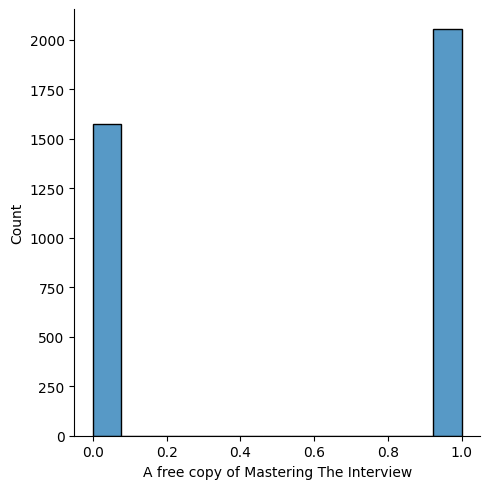

<Figure size 640x480 with 0 Axes>

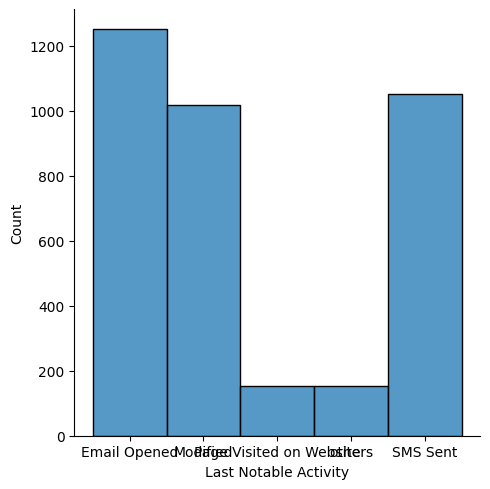

In [159]:
for column in df.columns:
    plt.figure()
    sns.displot(df[column])
    plt.show()

## Modelling

In [160]:
import pandas as pd

In [161]:
# pick last element from the dataframes array.
df_model = pd.read_pickle('cleaning_final.pkl')

### Scaling

In [162]:
df_model.select_dtypes(exclude=['object', 'bool']).columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the binary and categorical
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

df_model[num_vars] = scaler.fit_transform(df_model[num_vars])


In [164]:
df_model[num_vars].head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
2,0.007968,0.674296,0.125000
3,0.003984,0.134243,0.062500
6,0.007968,0.721831,0.125000
10,0.031873,0.594630,0.500000
11,0.031873,0.591109,0.166875


In [165]:
df_model.to_pickle('model_scale.pkl')

### Dummy Columns

In [166]:
df_model.select_dtypes('object').columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'Last Notable Activity'],
      dtype='object')

In [167]:
# create dummies
cat_columns = list(set(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'Last Notable Activity']).intersection(df_model.columns))

df_model = pd.get_dummies(df_model, drop_first=True, columns=cat_columns)

for col in df_model.columns:
    if df_model[col].dtype == 'bool':
        df_model[col] = df_model[col].astype(int)


In [168]:
df_model.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_others,Lead Source_Google,...,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_others
2,0,1,0.007968,0.674296,0.125000,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.003984,0.134243,0.062500,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1,0.007968,0.721831,0.125000,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
10,0,1,0.031873,0.594630,0.500000,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
11,0,1,0.031873,0.591109,0.166875,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [169]:
df_model.to_pickle("model_dummy.pkl")

### Train Test Split

In [170]:
df_model.shape

(3625, 53)

In [171]:
TRAIN_SIZE = 0.8
RANDOM_STATE = 100
Y_LABEL = 'Converted'

In [172]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_model, train_size = 0.8, test_size = 1-TRAIN_SIZE, random_state = RANDOM_STATE)

y_train = df_train[Y_LABEL]
X_train = df_train.drop(columns=Y_LABEL)
y_test = df_test[Y_LABEL]
X_test = df_test.drop(columns=Y_LABEL)

### Basic Model

In [173]:
# Importing RFE and LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_train, predictions_train))
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1603
           1       0.97      0.95      0.96      1297

    accuracy                           0.96      2900
   macro avg       0.96      0.96      0.96      2900
weighted avg       0.96      0.96      0.96      2900

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       395
           1       0.94      0.95      0.94       330

    accuracy                           0.95       725
   macro avg       0.95      0.95      0.95       725
weighted avg       0.95      0.95      0.95       725



In [174]:
# Even without using RFE, this preliminary model is quite strong.

### RFE

In [175]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [176]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


In [177]:
model.fit(X_train_rfe, y_train)
predictions_rfe = model.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, predictions_rfe)
print(f"Model Accuracy with RFE: {accuracy_rfe}")

Model Accuracy with RFE: 0.9503448275862069


In [178]:
X_train.columns[rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Source_others', 'Last Activity_SMS Sent',
       'What is your current occupation_others',
       'Last Notable Activity_Modified', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

In [179]:
# Calculate the VIFs for the new model
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X, y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.Logit(y, X).fit() # fitting the model
    return lm

def check_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif


### Removing high p-value

In [180]:
X_train_new = X_train[X_train.columns[rfe.support_]]
lm = build_model(X_train_new, y_train)
lm.summary()

         Current function value: 0.121718
         Iterations: 35


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2884
Method:                           MLE   Df Model:                           15
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8230
Time:                        17:18:29   Log-Likelihood:                -352.98
converged:                      False   LL-Null:                       -1994.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.5801      0.352    -12.996      0.000      -5.271      -3.889
Do Not Email                                -0.7411      0.478     -1.550      0.121      -1.678       0.196
TotalVisits                                 21.1837      7.419      2.855      0.004       6.643      35.725
Total Time Spent on Website                  3.6848      0.431      8.557      0.000       2.841       4.529
Lead Source_others                           1.4654      1.098      1.335      0.182      -0.687       3.617
Last Activity_SMS Sent                       1.0803      0.234      4.622      0.000       0.622       1.538
What is your current occupation_others       0.5636      0.395      1.425      0.154      -0.212       1.339
Last Notable Activity_Modified              -0.9027      0.261     -3.456      0.001      -1.415      -0.391
Tags_Busy                                    3.0663      0.336      9.114      0.000       2.407       3.726
Tags_Closed by Horizzon                      7.9237      1.052      7.533      0.000       5.862       9.985
Tags_Interested in other courses            -1.1445      0.764     -1.498      0.134      -2.642       0.353
Tags_Lost to EINS                           19.1104    326.546      0.059      0.953    -620.907     659.128
Tags_Not doing further education           -16.9776   3207.697     -0.005      0.996   -6303.948    6269.993
Tags_Ringing                                -0.7868      0.347     -2.268      0.023      -1.467      -0.107
Tags_Will revert after reading the email     6.2325      0.321     19.417      0.000       5.603       6.862
Tags_switched off                           -1.1392      0.648     -1.758      0.079      -2.409       0.131
============================================================================================================
"""

In [181]:
# drop due to high p-value
X_train_new.drop(['Tags_Not doing further education'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_83894/1460431089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Tags_Not doing further education'],axis=1, inplace=True)


         Current function value: 0.122406
         Iterations: 35


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2885
Method:                           MLE   Df Model:                           14
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.8220
Time:                        17:18:29   Log-Likelihood:                -354.98
converged:                      False   LL-Null:                       -1994.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.6538      0.352    -13.215      0.000      -5.344      -3.964
Do Not Email                                -0.8116      0.468     -1.736      0.083      -1.728       0.105
TotalVisits                                 19.3337      6.770      2.856      0.004       6.065      32.603
Total Time Spent on Website                  3.6986      0.431      8.580      0.000       2.854       4.544
Lead Source_others                           1.4363      1.066      1.347      0.178      -0.653       3.526
Last Activity_SMS Sent                       1.0955      0.234      4.679      0.000       0.637       1.554
What is your current occupation_others       0.5830      0.398      1.463      0.143      -0.198       1.364
Last Notable Activity_Modified              -0.9284      0.260     -3.577      0.000      -1.437      -0.420
Tags_Busy                                    3.1724      0.336      9.437      0.000       2.514       3.831
Tags_Closed by Horizzon                      8.0496      1.051      7.660      0.000       5.990      10.109
Tags_Interested in other courses            -1.0246      0.763     -1.343      0.179      -2.520       0.471
Tags_Lost to EINS                           13.3022     16.897      0.787      0.431     -19.816      46.420
Tags_Ringing                                -0.6797      0.346     -1.967      0.049      -1.357      -0.002
Tags_Will revert after reading the email     6.3384      0.321     19.772      0.000       5.710       6.967
Tags_switched off                           -1.0263      0.647     -1.587      0.112      -2.294       0.241
============================================================================================================
"""

In [182]:
X_train_new.drop(['Tags_Lost to EINS'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_83894/2182957672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Tags_Lost to EINS'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.165154
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2886
Method:                           MLE   Df Model:                           13
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.7598
Time:                        17:18:29   Log-Likelihood:                -478.95
converged:                       True   LL-Null:                       -1994.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4055      0.244    -13.946      0.000      -3.884      -2.927
Do Not Email                                -1.4786      0.402     -3.675      0.000      -2.267      -0.690
TotalVisits                                 18.6321      5.721      3.257      0.001       7.420      29.844
Total Time Spent on Website                  3.8542      0.359     10.738      0.000       3.151       4.558
Lead Source_others                           0.6648      0.906      0.734      0.463      -1.110       2.440
Last Activity_SMS Sent                       0.8710      0.199      4.380      0.000       0.481       1.261
What is your current occupation_others       0.6609      0.307      2.152      0.031       0.059       1.263
Last Notable Activity_Modified              -0.2166      0.200     -1.085      0.278      -0.608       0.175
Tags_Busy                                    1.9039      0.274      6.954      0.000       1.367       2.441
Tags_Closed by Horizzon                      6.4037      1.025      6.247      0.000       4.394       8.413
Tags_Interested in other courses            -2.6491      0.734     -3.611      0.000      -4.087      -1.211
Tags_Ringing                                -1.9007      0.283     -6.715      0.000      -2.455      -1.346
Tags_Will revert after reading the email     4.9530      0.241     20.509      0.000       4.480       5.426
Tags_switched off                           -2.2398      0.617     -3.629      0.000      -3.449      -1.030
============================================================================================================
"""

In [183]:
X_train_new.drop(['Lead Source_others'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_83894/2865134204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Lead Source_others'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.165248
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2887
Method:                           MLE   Df Model:                           12
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.7597
Time:                        17:18:30   Log-Likelihood:                -479.22
converged:                       True   LL-Null:                       -1994.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.3954      0.243    -13.949      0.000      -3.872      -2.918
Do Not Email                                -1.4826      0.403     -3.679      0.000      -2.272      -0.693
TotalVisits                                 18.7577      5.705      3.288      0.001       7.576      29.939
Total Time Spent on Website                  3.8422      0.358     10.726      0.000       3.140       4.544
Last Activity_SMS Sent                       0.8619      0.198      4.343      0.000       0.473       1.251
What is your current occupation_others       0.6564      0.307      2.140      0.032       0.055       1.258
Last Notable Activity_Modified              -0.2161      0.200     -1.083      0.279      -0.607       0.175
Tags_Busy                                    1.9080      0.274      6.973      0.000       1.372       2.444
Tags_Closed by Horizzon                      6.4897      1.023      6.346      0.000       4.485       8.494
Tags_Interested in other courses            -2.6539      0.733     -3.618      0.000      -4.091      -1.216
Tags_Ringing                                -1.9031      0.283     -6.727      0.000      -2.458      -1.349
Tags_Will revert after reading the email     4.9572      0.242     20.524      0.000       4.484       5.431
Tags_switched off                           -2.2424      0.617     -3.634      0.000      -3.452      -1.033
============================================================================================================
"""

In [184]:
X_train_new.drop(['Last Notable Activity_Modified'],axis=1, inplace=True)
lm = build_model(X_train_new, y_train)
lm.summary()

/var/folders/gn/_m6452xj7mg0cf7j0dvwvlgw0000gn/T/ipykernel_83894/2493671648.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_new.drop(['Last Notable Activity_Modified'],axis=1, inplace=True)


Optimization terminated successfully.
         Current function value: 0.165450
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 2900
Model:                          Logit   Df Residuals:                     2888
Method:                           MLE   Df Model:                           11
Date:                Mon, 19 Feb 2024   Pseudo R-squ.:                  0.7594
Time:                        17:18:30   Log-Likelihood:                -479.81
converged:                       True   LL-Null:                       -1994.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.4960      0.227    -15.434      0.000      -3.940      -3.052
Do Not Email                                -1.5015      0.402     -3.734      0.000      -2.290      -0.713
TotalVisits                                 19.1470      5.692      3.364      0.001       7.992      30.302
Total Time Spent on Website                  3.8275      0.357     10.707      0.000       3.127       4.528
Last Activity_SMS Sent                       0.8732      0.198      4.416      0.000       0.486       1.261
What is your current occupation_others       0.6588      0.307      2.146      0.032       0.057       1.261
Tags_Busy                                    1.9560      0.271      7.217      0.000       1.425       2.487
Tags_Closed by Horizzon                      6.4626      1.022      6.322      0.000       4.459       8.466
Tags_Interested in other courses            -2.6819      0.733     -3.659      0.000      -4.118      -1.245
Tags_Ringing                                -1.8438      0.277     -6.652      0.000      -2.387      -1.301
Tags_Will revert after reading the email     5.0085      0.238     21.065      0.000       4.542       5.474
Tags_switched off                           -2.1975      0.617     -3.564      0.000      -3.406      -0.989
============================================================================================================
"""

### Checking VIF

In [185]:
check_VIF(X_train_new)

,Features,VIF
9,Tags_Will revert after reading the email,2.70
2,Total Time Spent on Website,2.63
3,Last Activity_SMS Sent,1.72
1,TotalVisits,1.57
8,Tags_Ringing,1.39
4,What is your current occupation_others,1.32
6,Tags_Closed by Horizzon,1.19
5,Tags_Busy,1.15
7,Tags_Interested in other courses,1.10
10,Tags_switched off,1.10


Stop iteration since all VIF are below 5. This is the final model

### Predictions

In [186]:
X_test = sm.add_constant(df_test)

X_test = X_test[lm.model.exog_names]

y_test_pred = lm.predict(X_test)
y_train_pred = lm.predict(sm.add_constant(X_train_new))

In [187]:
# These y_train_pred and y_test_pred values are essentially probability of lead conversion.

In [188]:
print(classification_report(y_train, (y_train_pred > 0.5)))
print(classification_report(y_test, (y_test_pred > 0.5)))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1603
           1       0.95      0.92      0.94      1297

    accuracy                           0.94      2900
   macro avg       0.94      0.94      0.94      2900
weighted avg       0.94      0.94      0.94      2900

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       395
           1       0.94      0.90      0.92       330

    accuracy                           0.93       725
   macro avg       0.93      0.92      0.93       725
weighted avg       0.93      0.93      0.93       725

